In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from datetime import datetime

In [4]:
df = pd.read_csv('traffic_accidents.csv')

In [4]:
df.head()

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54517 entries, 0 to 54516
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   crash_date                     54517 non-null  datetime64[ns]
 1   traffic_control_device         54517 non-null  object        
 2   weather_condition              54517 non-null  object        
 3   lighting_condition             54517 non-null  object        
 4   first_crash_type               54517 non-null  object        
 5   trafficway_type                54517 non-null  object        
 6   alignment                      54517 non-null  object        
 7   roadway_surface_cond           54517 non-null  object        
 8   road_defect                    54517 non-null  object        
 9   crash_type                     54517 non-null  object        
 10  intersection_related_i         54517 non-null  object        
 11  damage         

In [4]:
df1323 = df.iloc[:,13:23]

In [5]:
df1323.head()

,num_units,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week
0,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7
1,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1
2,3,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5
3,2,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4
4,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7


In [5]:
df = df[df['most_severe_injury'] != 'NO INDICATION OF INJURY']

In [7]:
df['first_crash_type'].unique()

array(['ANGLE', 'FIXED OBJECT', 'SIDESWIPE OPPOSITE DIRECTION',
       'PEDALCYCLIST', 'TURNING', 'REAR END', 'PEDESTRIAN',
       'SIDESWIPE SAME DIRECTION', 'HEAD ON', 'OTHER NONCOLLISION',
       'PARKED MOTOR VEHICLE', 'REAR TO SIDE', 'OTHER OBJECT',
       'REAR TO FRONT', 'OVERTURNED', 'REAR TO REAR', 'ANIMAL', 'TRAIN'],
      dtype=object)

In [6]:
df['crash_date'] = pd.to_datetime(df['crash_date'])

In [7]:
df = df.reset_index(drop=True)

In [55]:
df.to_csv('car_accidents_clean.csv')

<Axes: xlabel='crash_month'>

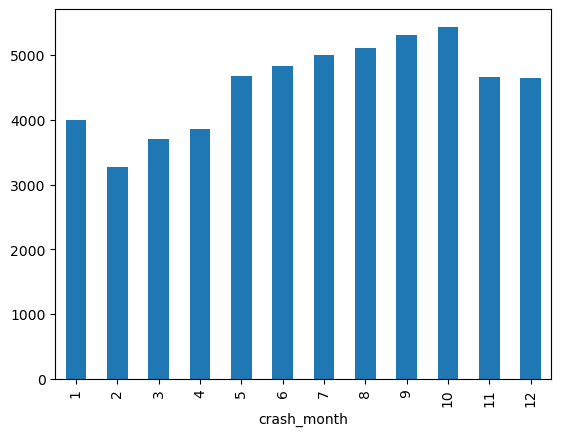

In [75]:
df.groupby('crash_month')['first_crash_type'].count().plot(kind='bar')

<Axes: xlabel='crash_date'>

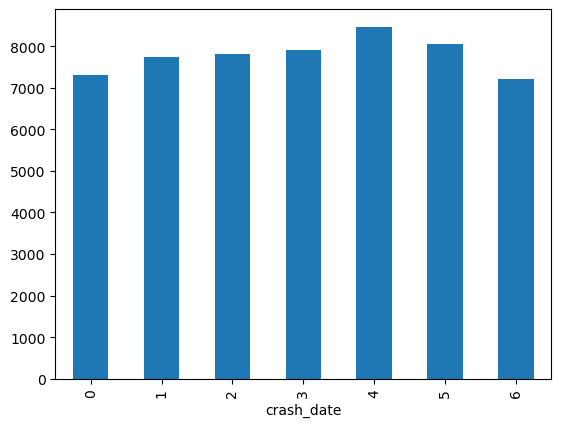

In [82]:
df.groupby(df['crash_date'].dt.dayofweek)['first_crash_type'].count().plot(kind='bar')

In [174]:
df_hour = pd.DataFrame(df.groupby(df['crash_date'].dt.hour)['first_crash_type'].count()).rename(columns={'first_crash_type':'n_accidents'})
df_hour

,n_accidents
crash_date,
0,1470
1,1204
2,1007
3,774
4,660
5,848
6,1375
7,2405
8,2840


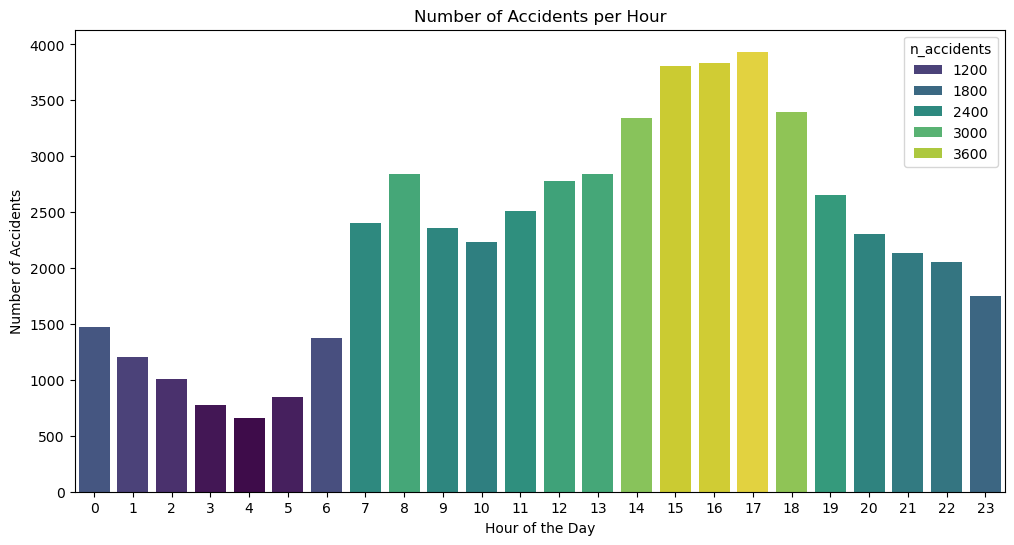

In [172]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_hour,
    x='crash_date',
    y='n_accidents',
    hue='n_accidents',
    palette='viridis'
)
plt.title('Number of Accidents per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.savefig('number_of_accidents_per_hour.png')
plt.show()


In [99]:
df.to_csv('car_acc.csv')

In [103]:
df.columns

Index(['crash_date', 'traffic_control_device', 'weather_condition',
       'lighting_condition', 'first_crash_type', 'trafficway_type',
       'alignment', 'roadway_surface_cond', 'road_defect', 'crash_type',
       'intersection_related_i', 'damage', 'prim_contributory_cause',
       'num_units', 'most_severe_injury', 'injuries_total', 'injuries_fatal',
       'injuries_incapacitating', 'injuries_non_incapacitating',
       'injuries_reported_not_evident', 'injuries_no_indication', 'crash_hour',
       'crash_day_of_week', 'crash_month'],
      dtype='object')

In [105]:
df['most_severe_injury'].unique()

array(['NONINCAPACITATING INJURY', 'INCAPACITATING INJURY',
       'REPORTED, NOT EVIDENT', 'FATAL'], dtype=object)

In [106]:
df_fatal = df[df['most_severe_injury'] == 'FATAL']

<Axes: xlabel='crash_date'>

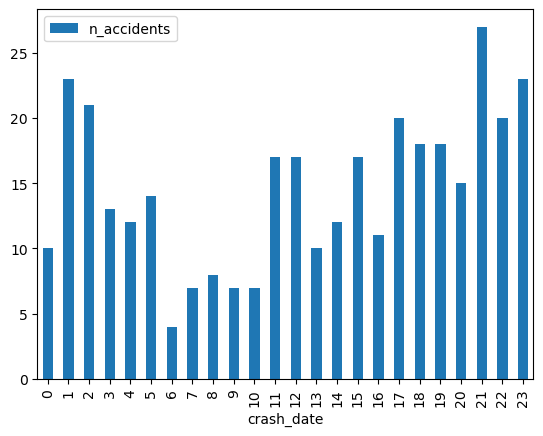

In [116]:
df_fatal_hour = pd.DataFrame(df_fatal.groupby(df_fatal['crash_date'].dt.hour)['first_crash_type'].count()).rename(columns={'first_crash_type':'n_accidents'})
df_fatal_hour.plot(kind='bar')

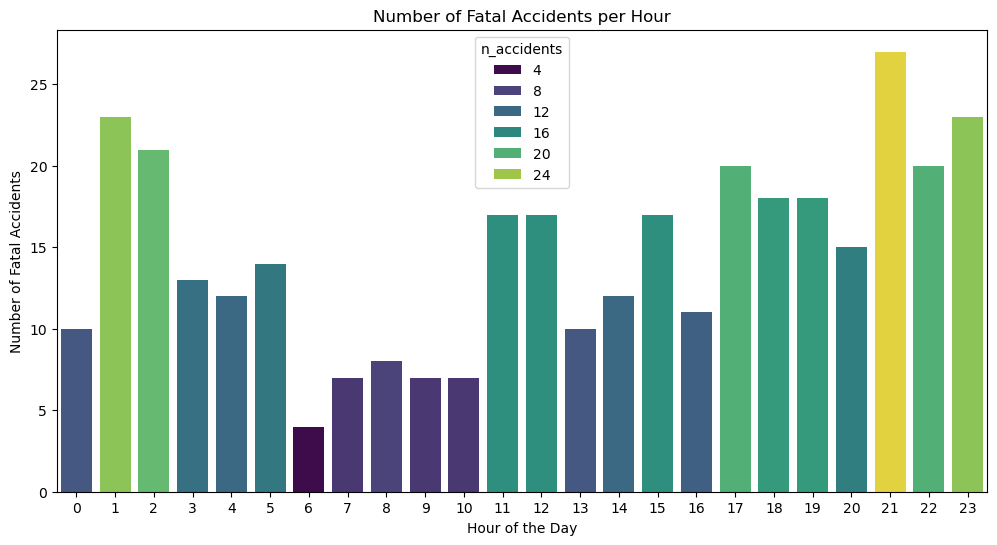

In [171]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_fatal_hour,
    x='crash_date',
    y='n_accidents',
    hue='n_accidents',
    palette='viridis'
)
plt.title('Number of Fatal Accidents per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Fatal Accidents')
plt.savefig('Fatal_Accidents_per_Hour.png')
plt.show()

<Axes: xlabel='crash_date'>

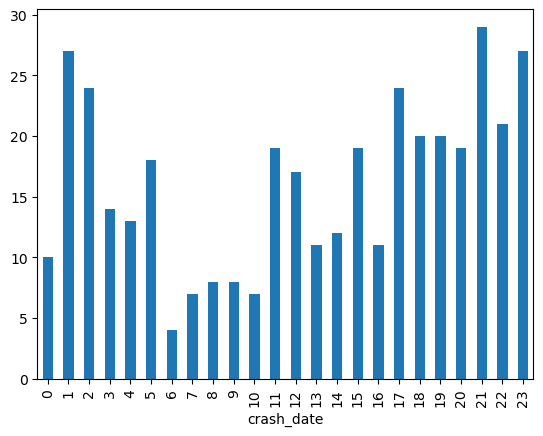

In [183]:
df.groupby(df['crash_date'].dt.hour)['injuries_fatal'].sum().plot.bar()

In [230]:
df_pivot = df.pivot_table(
    index='most_severe_injury',
    columns='crash_hour',
    values='weather_condition',
    aggfunc='count',
    fill_value=0
)
df_pivot

crash_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
most_severe_injury,,,,,,,,,,,,,,,,,,,,,
FATAL,10,23,21,13,12,14,4,7,8,7,...,12,17,11,20,18,18,15,27,20,23
INCAPACITATING INJURY,190,173,151,111,99,115,200,274,338,262,...,371,393,374,443,381,322,294,286,281,259
NONINCAPACITATING INJURY,913,718,611,481,406,509,790,1367,1630,1385,...,1878,2184,2241,2209,1983,1566,1374,1220,1198,1067
"REPORTED, NOT EVIDENT",357,290,224,169,143,210,381,757,864,703,...,1077,1209,1205,1263,1011,752,624,605,555,405


In [207]:
df_pivot = df_pivot.divide(df_pivot.sum(axis=1), axis=0)

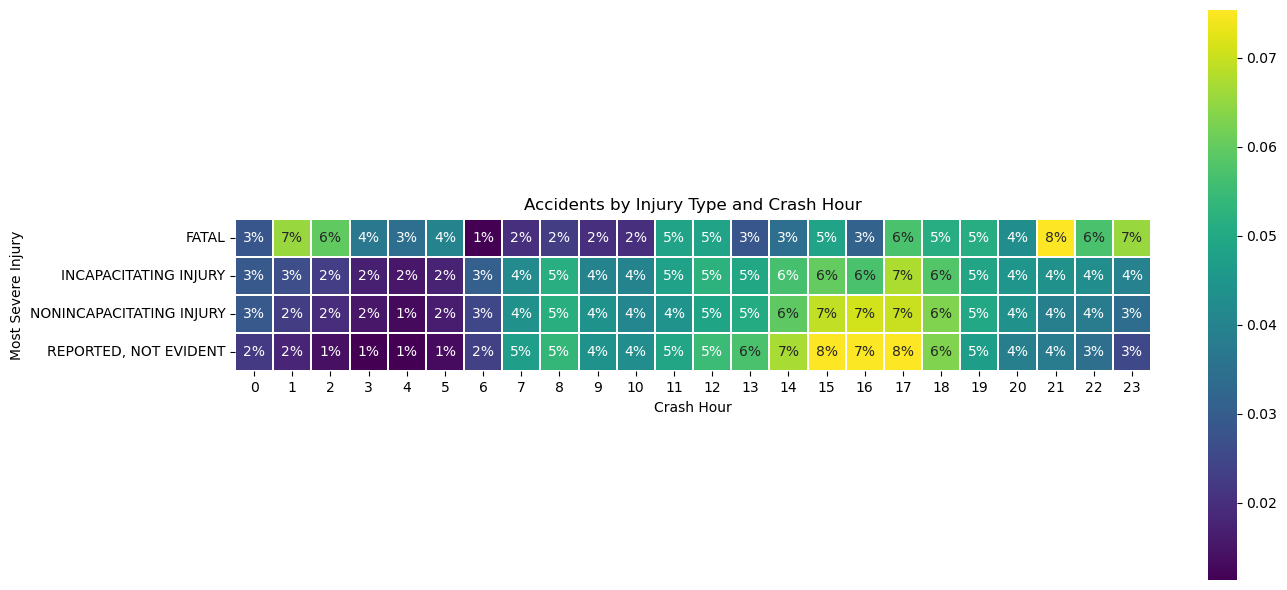

In [209]:
plt.figure(figsize=(14,6))
sns.heatmap(
    df_pivot,
    annot=True,
    fmt= '.0%',
    cmap='viridis',  
    linewidths=.2,
    robust=True,
    square=True
)
plt.title('Accidents by Injury Type and Crash Hour')
plt.xlabel('Crash Hour')
plt.ylabel('Most Severe Injury')
plt.tight_layout()
plt.savefig('accidents_by_injury_type_hour.png')
plt.show()

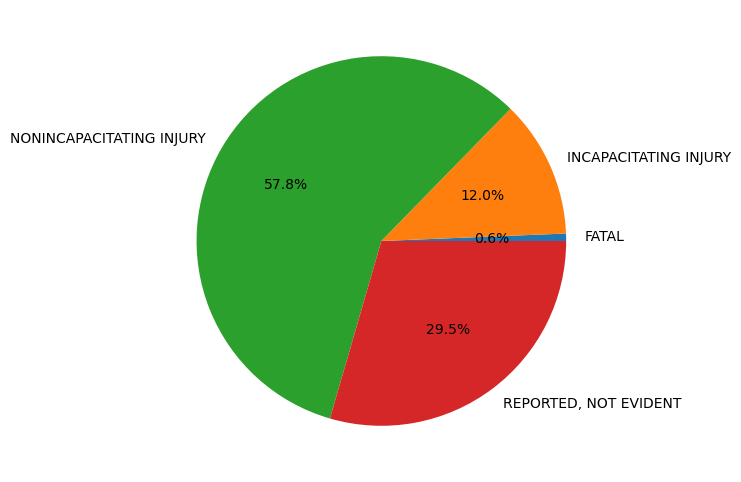

In [243]:
plt.figure(figsize=(10, 6))
plt.pie(df_injury['n_accidents'],
        autopct='%1.1f%%',
        labels = df_injury.index,)
plt.savefig('pieplot.png')
plt.show()

In [234]:
df['crash_date'].max()

Timestamp('2025-01-17 19:00:00')

In [235]:
df['crash_date'].min()

Timestamp('2013-03-03 16:48:00')

In [244]:
df['injuries_total'].sum()

np.float64(80105.0)

In [245]:
df['injuries_fatal'].sum()

np.float64(389.0)

<Axes: xlabel='crash_date'>

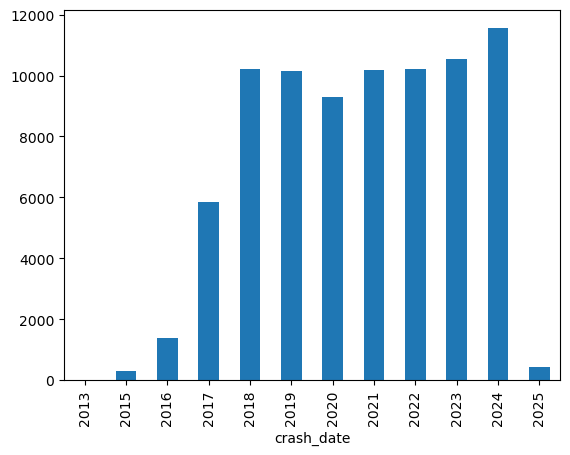

In [259]:
df.groupby(df['crash_date'].dt.year)['injuries_total'].sum().plot(kind='bar')

<Axes: xlabel='crash_date'>

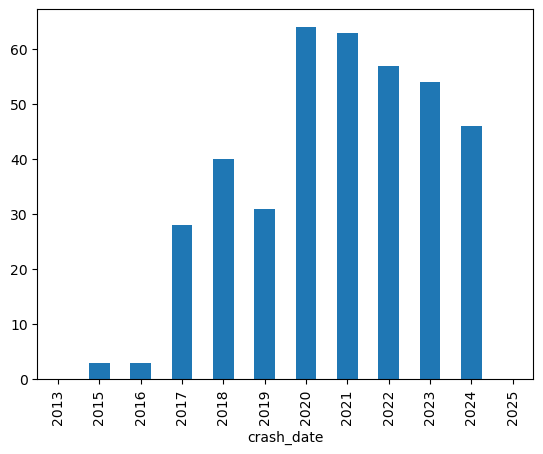

In [256]:
df.groupby(df['crash_date'].dt.year)['injuries_fatal'].sum().plot(kind='bar')

In [10]:
dec = df[df['crash_date'].dt.month == 12]

jan = df[df['crash_date'].dt.month == 1]

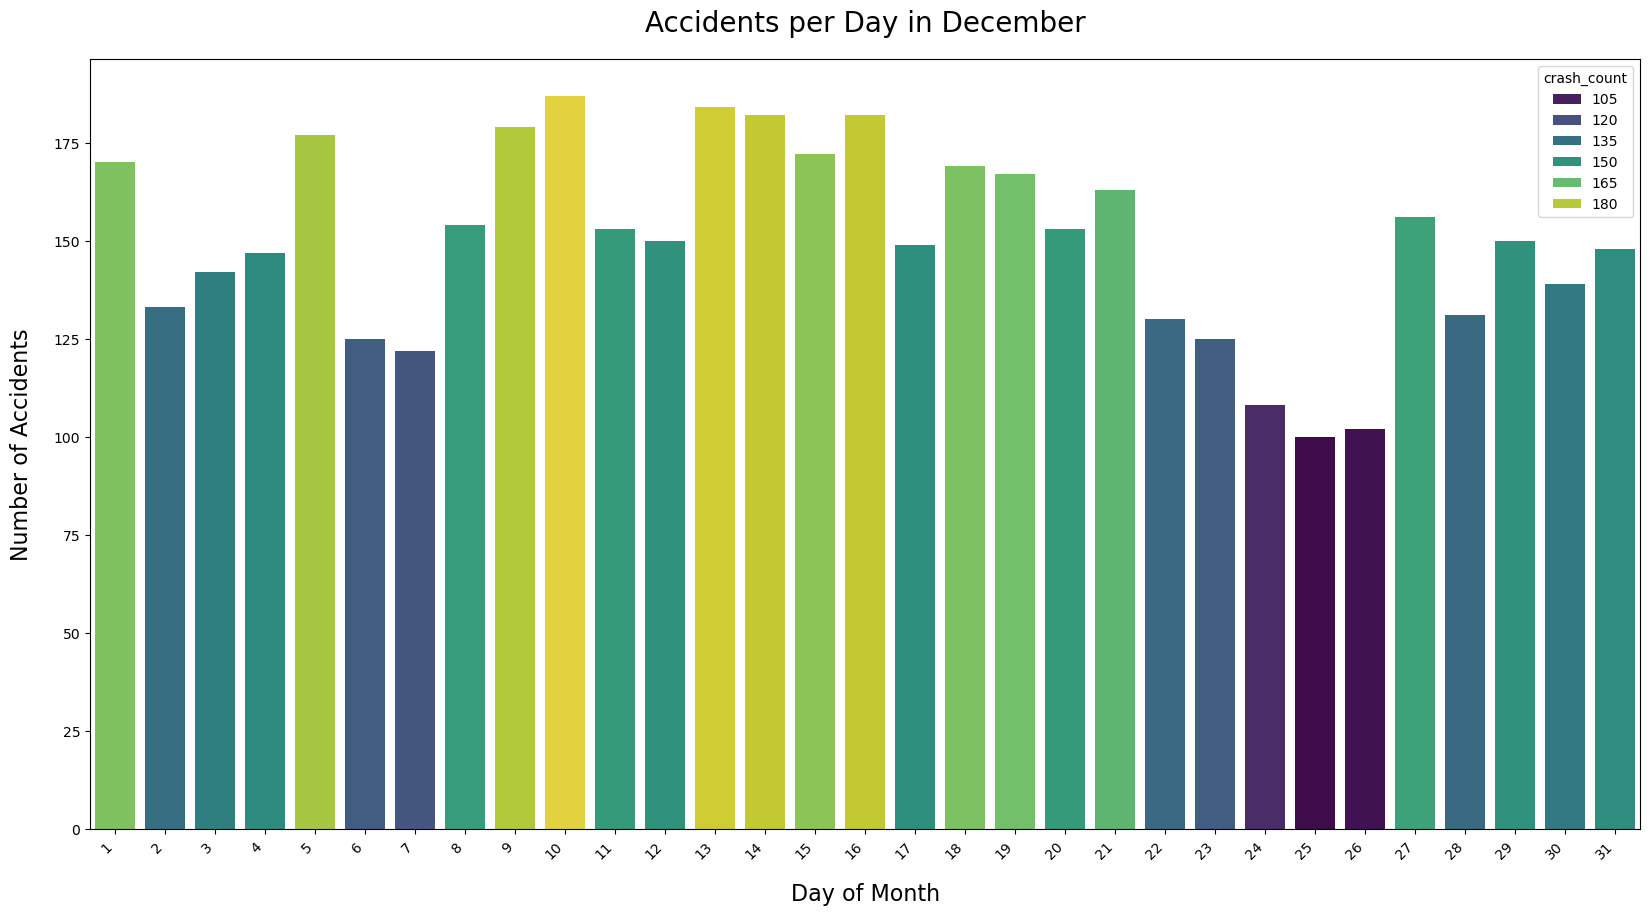

In [11]:
dec_plot = dec.groupby(dec['crash_date'].dt.day)['first_crash_type'].count().reset_index()
dec_plot.columns = ['day', 'crash_count']

plt.figure(figsize=(20, 10))

sns.barplot(x='day', y='crash_count', hue='crash_count', data=dec_plot, palette='viridis')

plt.xticks(rotation=45, ha='right')

plt.title("Accidents per Day in December", pad=20, fontsize=20)

plt.xlabel("Day of Month", fontsize=16, labelpad=15)
plt.ylabel("Number of Accidents", fontsize=16, labelpad=15)

plt.show()

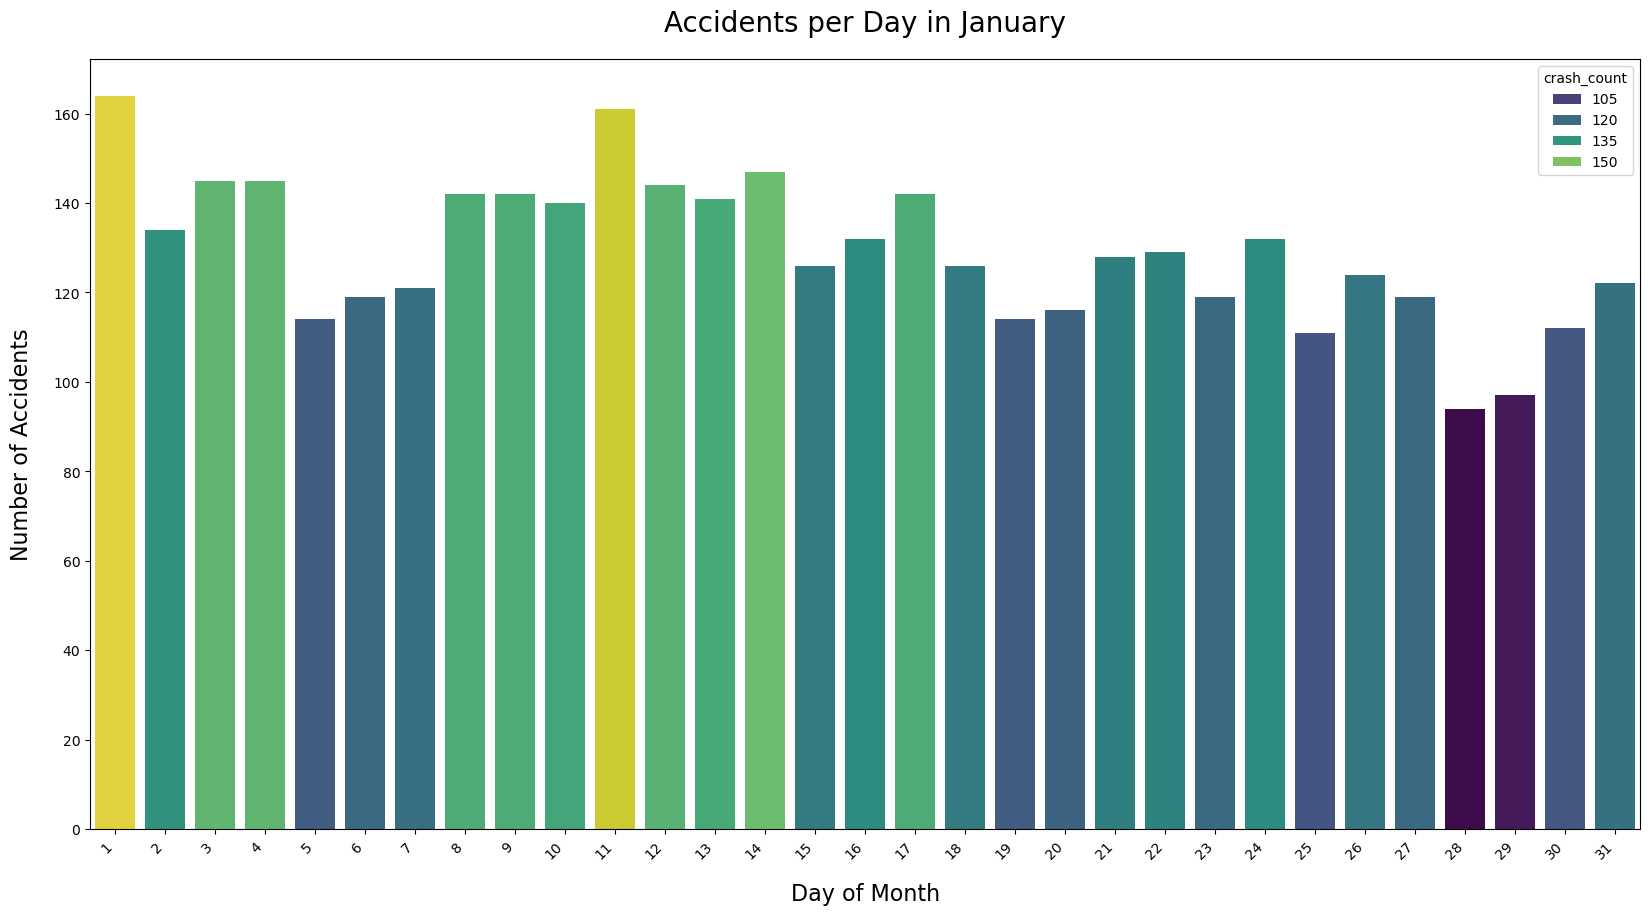

In [12]:
jan_plot = jan.groupby(jan['crash_date'].dt.day)['first_crash_type'].count().reset_index()
jan_plot.columns = ['day', 'crash_count']

plt.figure(figsize=(20, 10))

sns.barplot(x='day', y='crash_count', hue='crash_count', data=jan_plot, palette='viridis')


plt.xticks(rotation=45, ha='right')


plt.title("Accidents per Day in January", pad=20, fontsize=20)

plt.xlabel("Day of Month", fontsize=16, labelpad=15)
plt.ylabel("Number of Accidents", fontsize=16, labelpad=15)

plt.show()

In [13]:
jan1=jan[jan['crash_date'].dt.day==1]

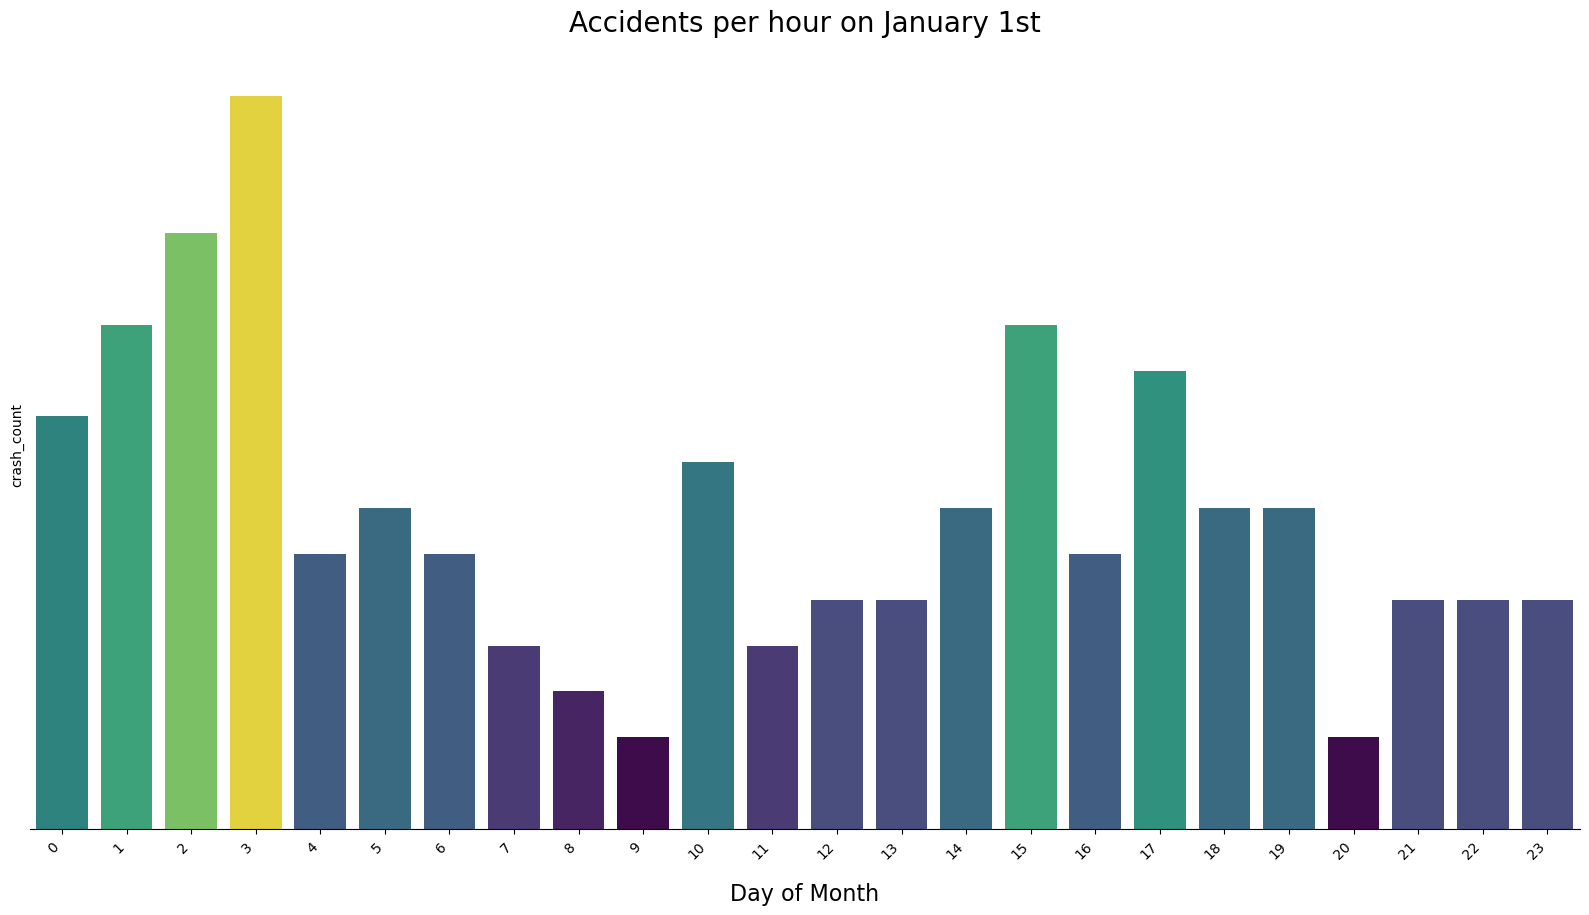

In [14]:
jan1_plot = jan1.groupby(jan1['crash_hour'])['first_crash_type'].count().reset_index()
jan1_plot.columns = ['day', 'crash_count']

plt.figure(figsize=(20, 10))

sns.barplot(x='day', y='crash_count', hue='crash_count', data=jan1_plot, palette='viridis', legend=False)

plt.yticks([])


sns.despine(left=True, top=True, right=True)


plt.xticks(rotation=45, ha='right')


plt.title("Accidents per hour on January 1st", pad=20, fontsize=20)

plt.xlabel("Day of Month", fontsize=16, labelpad=15)

plt.show()

In [10]:
weather = df.groupby('weather_condition')['first_crash_type'].count()
weather

weather_condition
BLOWING SNOW                 26
CLEAR                     43412
CLOUDY/OVERCAST            1975
FOG/SMOKE/HAZE              107
FREEZING RAIN/DRIZZLE       160
OTHER                       204
RAIN                       6180
SEVERE CROSS WIND GATE        5
SLEET/HAIL                   99
SNOW                       1500
UNKNOWN                     849
Name: first_crash_type, dtype: int64

In [16]:
df['weather_condition'].unique()

array(['CLEAR', 'RAIN', 'UNKNOWN', 'CLOUDY/OVERCAST',
       'FREEZING RAIN/DRIZZLE', 'SNOW', 'SLEET/HAIL', 'BLOWING SNOW',
       'OTHER', 'FOG/SMOKE/HAZE', 'SEVERE CROSS WIND GATE'], dtype=object)

In [8]:
clear = df[df['weather_condition']=='CLEAR']
rain = df[df['weather_condition']=='RAIN']
snow = df[df['weather_condition']=='SNOW']
non_clear = df[df['weather_condition']!='CLEAR']

In [11]:
rain_inj = rain['injuries_total'].sum()
rain_fatal = rain['injuries_fatal'].sum()
rain_acc = weather['RAIN']

print(rain_fatal/rain_inj)
print(rain_inj/rain_acc)

0.004590751315642145
1.4451456310679611


In [12]:
clear_inj = clear['injuries_total'].sum()
clear_fatal = clear['injuries_fatal'].sum()
clear_acc = weather['CLEAR']

print(clear_fatal/clear_inj)
print(clear_inj/clear_acc)

0.0050234062738145225
1.4811342485948586


In [13]:
non_clear_inj = non_clear['injuries_total'].sum()
non_clear_fatal = non_clear['injuries_fatal'].sum()
non_clear_acc = weather.sum()-weather['CLEAR']

print(non_clear_fatal/non_clear_inj)
print(non_clear_inj/non_clear_acc)

0.004175629507781855
1.4233228275551553


In [14]:
dry = df[df['roadway_surface_cond']=='DRY']

other_cond = df[df['roadway_surface_cond']!='DRY']

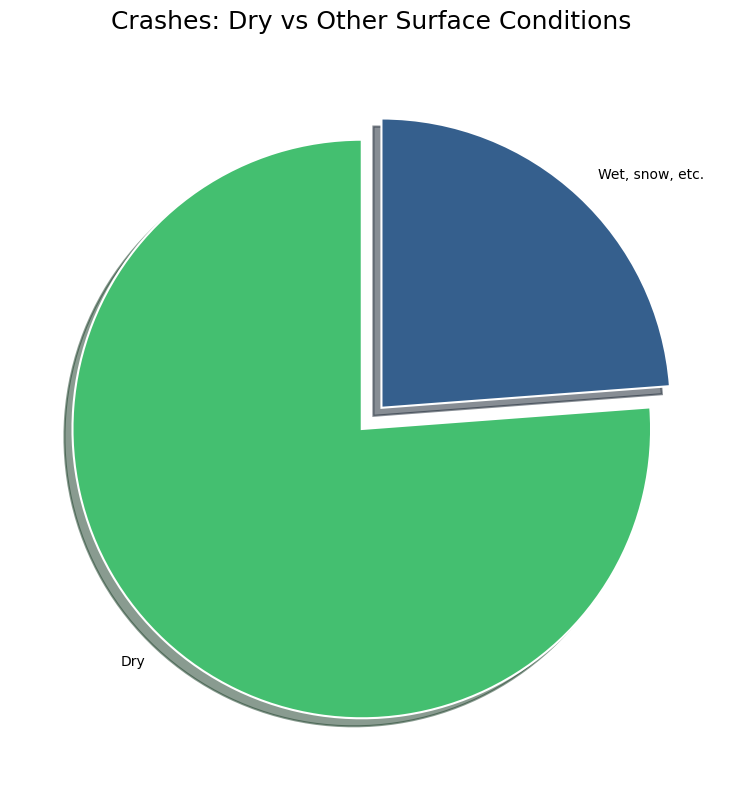

In [23]:
counts = [len(dry), len(other_cond)]

plt.figure(figsize=(8, 8))
plt.pie(
    counts,
    labels=['Dry', 'Wet, snow, etc.'],
    startangle=90,
    colors=plt.cm.viridis([0.7, 0.3]),
    explode=[0.05, 0.05],
    shadow=True, 
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5}
)

plt.title("Crashes: Dry vs Other Surface Conditions", fontsize=18, pad=20)
plt.tight_layout()
plt.show()

In [25]:
f_other_cond = other_cond[other_cond['most_severe_injury']=='FATAL']
f_dry = dry[dry['most_severe_injury']=='FATAL']

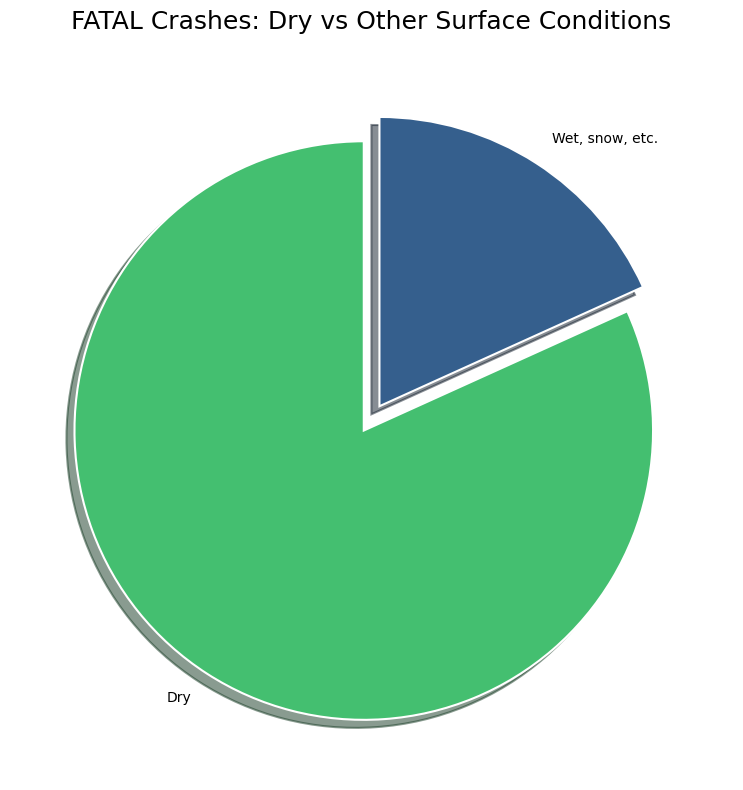

In [26]:
counts = [len(f_dry), len(f_other_cond)]

plt.figure(figsize=(8, 8))
plt.pie(
    counts,
    labels=['Dry', 'Wet, snow, etc.'],
    startangle=90,
    colors=plt.cm.viridis([0.7, 0.3]),
    explode=[0.05, 0.05],
    shadow=True, 
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5}
)

plt.title("FATAL Crashes: Dry vs Other Surface Conditions", fontsize=18, pad=20)
plt.tight_layout()
plt.show()

In [28]:
df_injury = df.groupby('most_severe_injury')['weather_condition'].count().reset_index()

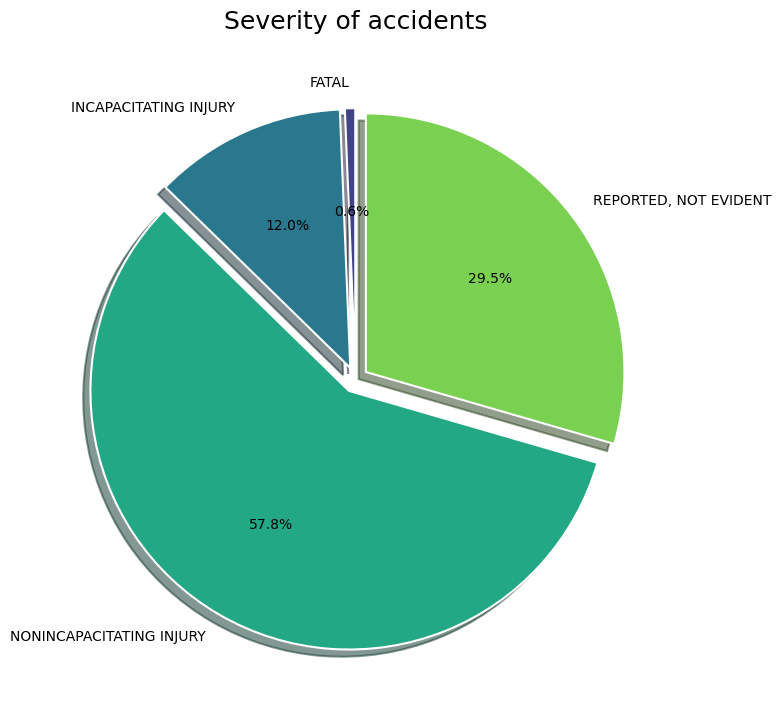

In [55]:
df_injury.columns = ['injury', 'n_accidents']

plt.figure(figsize=(8, 8))
plt.pie(
    df_injury['n_accidents'],
    labels=df_injury['injury'],
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("viridis", len(df_injury)),
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5},
    explode = [0.05,0.05,0.05,0.05],
    shadow=True 
)

plt.title("Severity of accidents", fontsize=18, pad=20)
plt.tight_layout()
plt.show()